# Домашняя работа №3 (Курс "Advanced Python", 2 семестр)
## ФИО:

**Тема:** Машинное обучение  
**Выдана:** 16 апреля  
**Мягкий дедлайн:** 23 апреля  
**Жесткий дедлайн:** 30 апреля

#### Данное задание идет с весом 1.5! Т.е за эту работу можно получить максимум 10 * 1.5 = 15 баллов!

**Правила:**
Результат выполнения задания - отчет в формате Jupyter Notebook с кодом и выводами. В ходе выполнения задания требуется реализовать все необходимые алгоритмы, провести эксперименты и ответить на поставленные вопросы. Дополнительные выводы приветствуются. Чем меньше кода и больше комментариев - тем лучше.

Все ячейки должны быть "выполненными", при этом результат должен воспроизвдиться при проверке.

Задание выполняется самостоятельно. **Если вы нашли в Интернете какой-то код, который собираетесь заимствовать, обязательно укажите это в задании.** Если вы советовались с товарищем и/или позаимствовали его решение, обязательно укажите об этом в отчете. Нет ничего плохого в том, что вы пытаетесь разобраться и помогаете друг другу; плохо - когда вы скрываете это и выдаете чужие заслуги за свои. При обнаружении списывания ВСЕМ студентам, имеющим одинаковые списанные решения будет выставлен ОТРИЦАТЕЛЬНЫЙ балл (т.е если задача стоит 4 балла, вы получите не 0, а -4), "оригинал" искаться не будет

Задание, сданное после жесткого дедлайна, не принимается.

Автор задания: Павел Плюснин

# MNIST (10 баллов)
Давайте посмотрим на еще один классический датасет. В нем необходимо классифицировать цифры на изображении

In [13]:
from sklearn.datasets import fetch_openml

In [14]:
#эта команда может выполняться несколько минут
mnist = fetch_openml('mnist_784', version=1)

In [16]:
print("Размерность данных" , mnist.data.shape)

Размерность данных (70000, 784)


Каждое изображение представляет собой матрицу 28*28 (вектор из 784 значений)

In [19]:
#на collab нормально запускался, в юпитере только так
mnist.data.to_numpy()[0].reshape((28,28)) #вектор представил в виде матрицы 28*28

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [20]:
#Изображенные цифры (метки классов) содержатся в 
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

**Пункт 0 (0.2 балла)**: разделите данные на обучающую и тестовую выборку. На тест оставьте 10% данных

In [25]:
from sklearn.model_selection import train_test_split

X = mnist.data.to_numpy()
y = mnist.target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

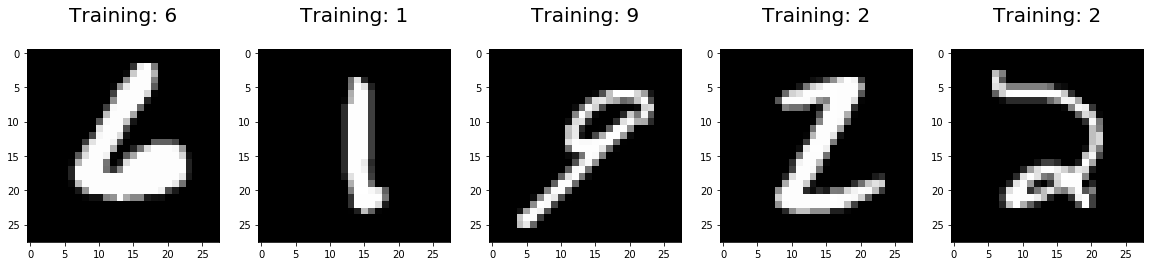

In [26]:
# Посмотрим, как выглядят наши цифры
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %s\n' % label, fontsize = 20)

# Модели без предобработки

**Пункт 1.1 (1 балл):** Постройте 3 линейные модели на изображениях как есть (используйте все 784 признака без предобработки). Постройте Логистическую регрессию, а также линейную модель с L2(ridge) и L1(lasso) регуляризаторами. Как долго учились модели? 

**За каждое отсутствие ответа на текстовые вопросы (в том числе за пункты, без проставления баллов) - минус пол балла**

In [27]:
import numpy as np
from sklearn.linear_model import  LogisticRegression, Ridge, Lasso
import time


In [39]:

logreg= LogisticRegression()
start = time.time()
logreg.fit(X_train,y_train)
end = time.time()
print('Логистическая регрессия учится: ' + str(end - start) +'c')
print("Accuracy: {}".format(logreg.score(X_test, y_test)))

Логистическая регрессия учится: 19.04250168800354c
Accuracy: 0.9258571428571428


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
l1= Lasso()
start = time.time()
l1.fit(X_train,y_train)
end = time.time()
print('Lasso регрессия учится: ' + str(end - start) +'c')
print("Accuracy: {}".format(l1.score(X_test, y_test)))

Lasso регрессия учится: 6.801818370819092c
Accuracy: 0.598302699248306


In [41]:
l2= Ridge()
start = time.time()
l2.fit(X_train,y_train)
end = time.time()
print('Ridge регрессия учится: ' + str(end - start) +'c')
print("Accuracy: {}".format(l2.score(X_test, y_test)))

Ridge регрессия учится: 1.2395312786102295c
Accuracy: 0.6067806835598846


**Пункт 1.2 (3 балла):** Постройте kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели (вам может помочь поиск по сетке)

In [42]:
#там надо побольше параметров выставить, но у меня ноутбук не тянет, считает миллионы лет даже с двумя параметрами
# и кроссвалидацию тоже надо поставить
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_space = np.arange(2,9)
param_grid = {'n_neighbors': n_space}
k_neighbors = KNeighborsClassifier()
k_neighbors_cv = GridSearchCV(k_neighbors, param_grid, cv = 3)
k_neighbors_cv.fit(X_train, y_train)



GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8])})

Best Parameters: {'n_neighbors': 3}
Accuracy: 0.9775714285714285


Text(0.5, 1, 'knn_Predictor')

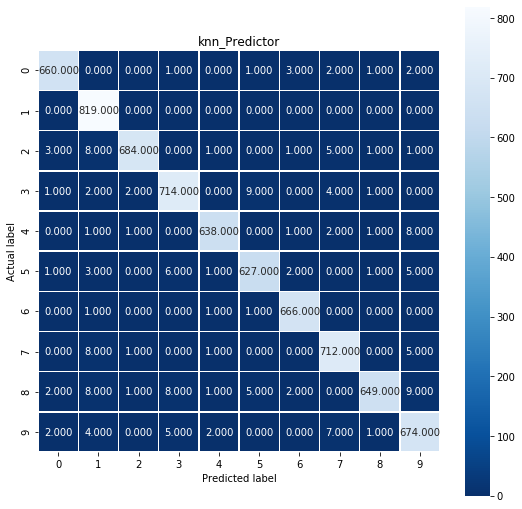

In [43]:
k_neighbors_best = k_neighbors_cv.best_estimator_
print("Best Parameters: {}".format(k_neighbors_cv.best_params_)) 

print("Accuracy: {}".format(k_neighbors_best.score(X_test, y_test)))
conf_matrix = confusion_matrix(y_test,k_neighbors_best.predict(X_test))
    
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('knn_Predictor')

Best Parameters: {'n_estimators': 110}
Accuracy: 0.9735714285714285


Text(0.5, 1, 'random_forest_Predictor')

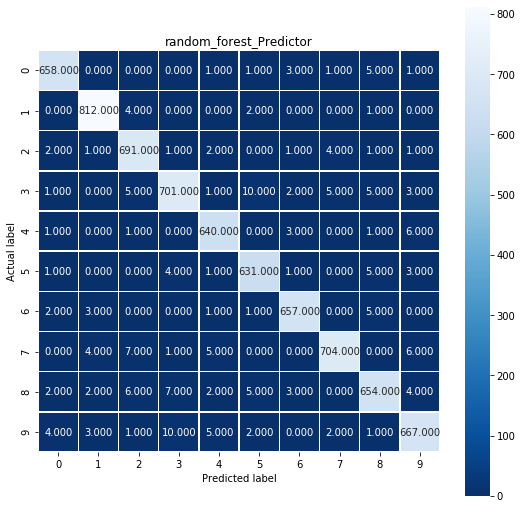

In [37]:
from sklearn.ensemble import RandomForestClassifier
n_space = np.arange(10,120, 10)
param_grid = {'n_estimators': n_space}
forest = RandomForestClassifier()
forest_cv = GridSearchCV(forest, param_grid, cv=3)
forest_cv.fit(X_train, y_train)
forest_best = forest_cv.best_estimator_
print("Best Parameters: {}".format(forest_cv.best_params_)) 

print("Accuracy: {}".format(forest_best.score(X_test, y_test)))
conf_matrix = confusion_matrix(y_test,forest_best.predict(X_test))
    
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label')
plt.title('random_forest_Predictor')


In [96]:
from sklearn.ensemble import GradientBoostingClassifier
n_space = [100] # он даже с двумя считает очень долго, и то не досчитал
param_grid = {'n_estimators': n_space}
treeboost = GradientBoostingClassifier()
treeboost_cv = GridSearchCV(treeboost, param_grid, cv=3)
treeboost_cv.fit(X_train, y_train)
treeboost_best = treeboost_cv.best_estimator_
print("Best Parameters: {}".format(treeboost_cv.best_params_)) 

print("Accuracy: {}".format(treeboost_best.score(X_test, y_test)))
conf_matrix = confusion_matrix(y_test,treeboost_best.predict(X_test))
    
plt.figure(figsize=(9,9))
sns.heatmap(conf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label')
plt.title('treeboost_Predictor')

KeyboardInterrupt: 

**Пункт 2.1:**Как вы думаете, можно ли для данной задачи в качестве метрики качества использовать Accuracy? Обоснуйте свой ответ

Наверное так не очень показательно. Потому что если модель ошибается в определении 1и7 это одно, они похожи, а когда не отличает 5 от 7 - уже хуже, а accuracy считает это за равновесовую ошибку.

**Пункт 2.2:** в любом случае, посмотрите на Accuracy для ваших моделей. Какая из них отработала лучше всего? Как вы думаете, почему?

In [ ]:
Бустинг так и не досчитался, наверное, у него была б самая высокая, раз он на своих ошибках учится. А так у knn выше

**Пункт 2.3 (0.2 балла)**: получите confusion матицы ваших классификаторов

# Понижаем размерность

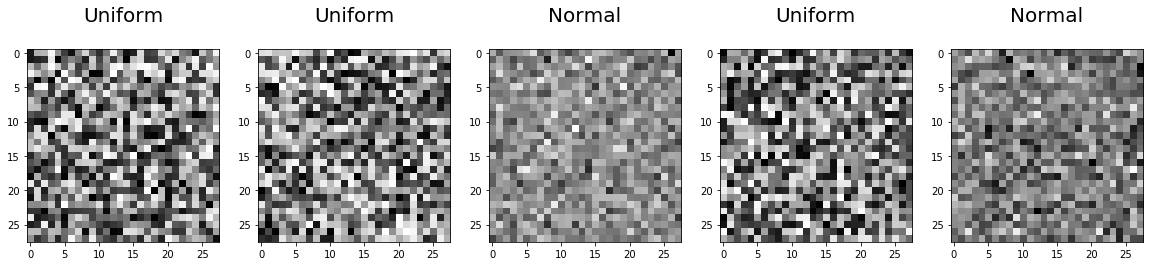

In [44]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    #сгенерируем из равномерного или нормального распределений
    is_normal = np.random.randint(0,2)
    if is_normal:
        image = np.random.randn(784)
    else:
        image = np.random.randint(0, 255, 784)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    
    label = "Normal" if is_normal else "Uniform"
    plt.title('%s\n' % label, fontsize = 20)

Заметим, что наши изображения далеки от случайного шума, т.е наши данные явно имеют размерность ниже, чем 784

**Пункт 3.1:** используя t-SNE, постройте визуализацию объектов на плоскости (чтобы все отрисовалось быстрее, стройте не на всей выборке, а только на 2000 элементах). Насколько хорошо выделились классы?

### В пунктах 3 и 4 работаем только с подвыборкой размера 2000!

In [49]:
from sklearn.manifold import TSNE
tsne = TSNE()
start = time.time()
tsne_representation = tsne.fit_transform(X_train[:2000])
end = time.time()
print('TSNE учится: ' + str(end - start) +'c')

TSNE учится: 13.944199800491333c


In [47]:
import pandas as pd
#Чтобы визуализация была корректной, вы должны были трансформировать X_train[:2000]
tsne_repr = pd.DataFrame()
tsne_repr['tsne-2d-one'] = tsne_representation[:,0]
tsne_repr['tsne-2d-two'] = tsne_representation[:,1]
tsne_repr["y"] = y_train[:2000]

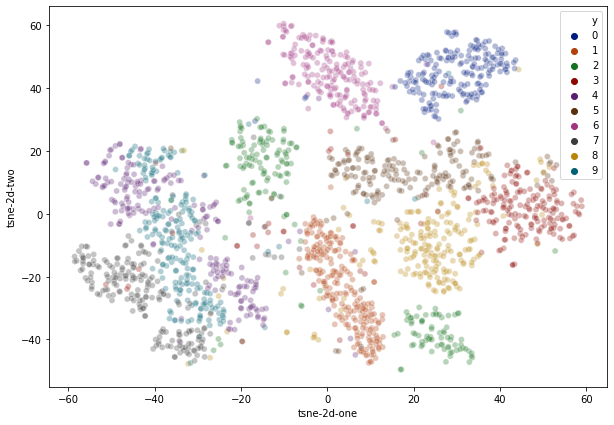

In [48]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 3.2 (за пункты 3.1+3.2 = 0.8 баллов)**: для сравнения постройте на тех же данных такую же визуализацию, используя метод главных компонент. Сравните две визуализации (по скорости построения, а также по качеству кластеризации)

In [50]:
from sklearn.decomposition import PCA
pca = PCA()
start = time.time()
pca_representation = pca.fit_transform(X_train[:2000])
end = time.time()
print('PCA учится: ' + str(end - start) +'c')

PCA учится: 0.4301271438598633c


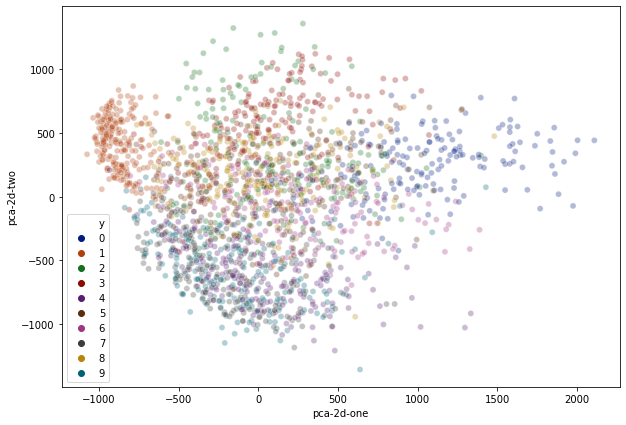

In [51]:
pca_repr = pd.DataFrame()
pca_repr['pca-2d-one'] = pca_representation[:,0]
pca_repr['pca-2d-two'] = pca_representation[:,1]
pca_repr["y"] = y_train[:2000]

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="pca-2d-one", y="pca-2d-two",
    hue="y",
    palette=sns.color_palette("dark", 10),
    data=pca_repr,
    legend="full",
    alpha=0.3
)

## Видно, что PCA кластеризует гораздо хуже, зато работает в 30 раз быстрее.

# Кластеризация
Давайте временно отвлечемся на данные tsne_repr, полученные применением t-SNE к 2000 объектам train данных

In [53]:
tsne_repr.head()

,tsne-2d-one,tsne-2d-two,y
0,7.970948,44.394375,6
1,-0.671680,-10.609612,1
2,-14.491227,-36.139469,9
3,21.140293,-38.747524,2
4,-8.431334,15.970918,2


**Пункт 4.1: (1 балл)** Давайте посмотрим на работу алгоритма DBSCAN (не передавайте метку класса y!). Зафиксируем минимальное количество объектов в корневой точке - 55. Подберите радиус окрестности (может быть дробным), чтобы dbscan выделил ровно 10 классов (включая класс выбросов "-1"), но так, чтобы в каждом классе (в шумовом в том числе) было не более 400 объектов. Последнее ограничение введено затем, чтобы большинство объектов не попало в один большой кластер, а остальные кластера оказались незначительно мелкими

In [88]:
from sklearn.cluster import DBSCAN
# подбор радиуса
# смотрим на предыдущие картиночки
# между зеленым и оранжевым классами расстояние явно меньше десяти, подбираем методом тыка,
#пока не будет удовлетворять заданным требованиям
# в третьем классе получилось 413, сколько не игралась, меньше не сделать

dbscan_repr = DBSCAN(min_samples=55, eps=7.3135).fit_predict(tsne_repr.iloc[:, :-1]) 

np.vstack(np.unique(dbscan_repr, return_counts=True))


array([[ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8],
       [392, 266, 184, 145, 413, 171, 188,  77,  70,  94]], dtype=int64)

**Посмотрите на визуализацию точек выше, насколько адекватно был выбран радиус окрестности?**

Кажется вполне адекватно)) 

Посмотрим, насклько качественно отработал DBSCAN

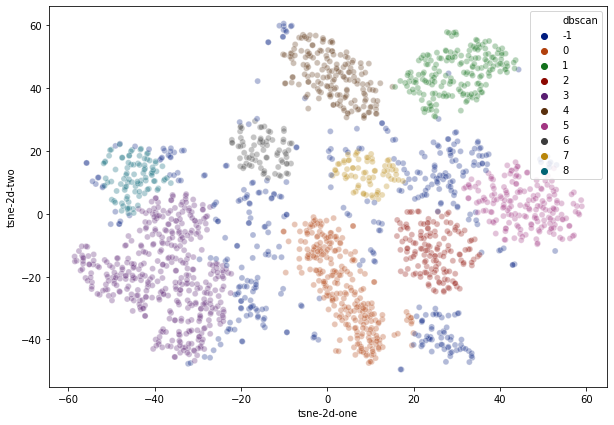

In [89]:

tsne_repr["dbscan"] = dbscan_repr

plt.figure(figsize=(10,7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="dbscan",
    palette=sns.color_palette("dark", 10),
    data=tsne_repr,
    legend="full",
    alpha=0.3
)

**Пункт 5.1 (1 балл)**. Вернитесь ко всей выборке. Пользуясь критерием крутого спуска найдите характерную размерность данных.   
**Пункт 5.2 (1 балл)** Во время поиска эффективной размерности, ужимайте Train и test выборку до текущей раземрности и стройте понравивщуюся линейную модель на train данных, записывайте метрику качества на тестовых данных. Постройте график зависимости качества от размерности. Верно ли, что с качеством наблюдается такая же тенденция, что и с сохраненной дисперсией? Наблюдается ли крутой спуск/подъем? Если да, то происходит ли он на эффективном значении расзмерноти (где наблюдается крутой спуск потерянной дисперсии)?

In [94]:
pca = PCA()
pca.fit(X)


PCA()

No handles with labels found to put in legend.


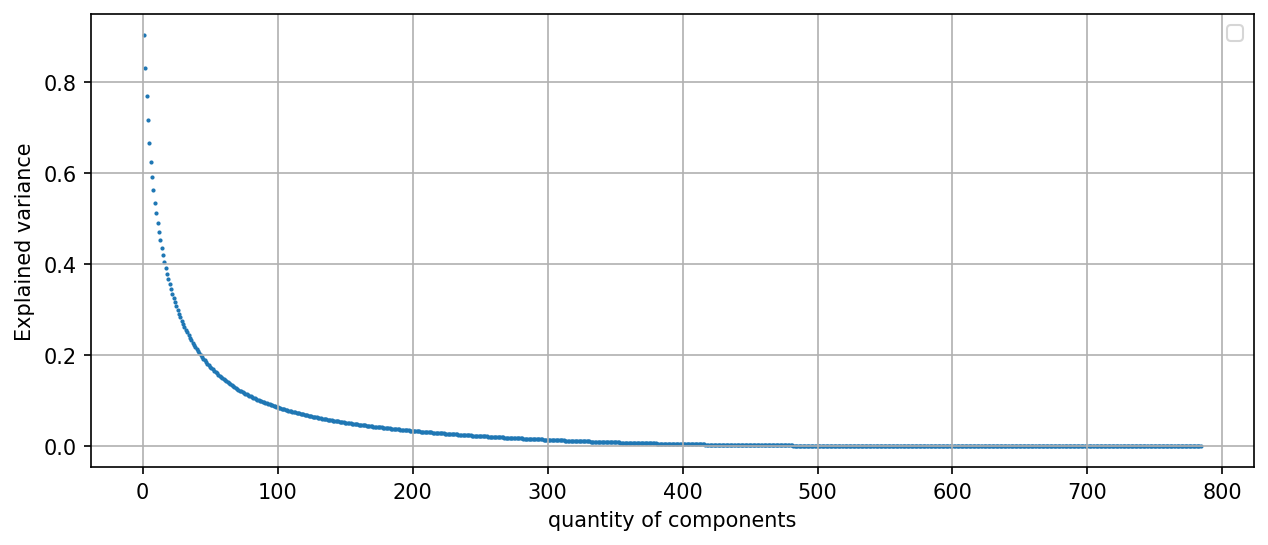

In [95]:
plt.figure(dpi=150, figsize=(10, 4))
plt.scatter(range(1, 785), 1 - np.cumsum(pca.explained_variance_ratio_), s=1)
plt.xlabel('quantity of components')
plt.ylabel('Explained variance')
plt.grid(); plt.legend()

Тут нет крутого склона((((
Найдем тогда число компонент, покрывающий 97% дисперсии


In [98]:
print('Эффективная размерность равна: ', np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.97)[0][0])

Эффективная размерность равна:  213


In [99]:
## Я  всё. Итак уже все просрочила((((((

# Строим модели на данных меньшей размерности
Понизьте размерность данных до эффективной размерности (помните, что это не то значение, на котором происходит резкий спуск, а следующее)

**Пункт 6.1 (0.9 баллов)** Постройте линейные модели, kNN классификатор, случайный лес, а также бустинг над деревьями. Подберите оптимальные гиперпараметры для каждой модели. Сравните качества с достигнутыми качествами до понижения размерности. Сделайте выводы.

**Пункт 6.2 (0.9 баллов)** Отнормируйте признаки используя StandardScaler. Постройте те же типы моделей, что и в предыдущем пункте, подберите оптимальные гиперпараметры. Сравните метрики качества, сделайте выводы

In [ ]:
#ваш код здесь